In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Problem Statement: Avocado is a fruit consumed by people heavily in the United States.

Content This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation AveragePrice - the average price of a single avocado type - conventional or organic year - the year Region - the city or region of the observation Total Volume - Total number of avocados sold 4046 - Total number of avocados with PLU 4046 sold 4225 - Total number of avocados with PLU 4225 sold 4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single f

In [2]:
df = pd.read_csv('C:\\Users\\pc\\Desktop\\jupyter_notebook\\avocado.csv')

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# EDAprocess

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.7+ MB


In [7]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [8]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [9]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [11]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [12]:
df.drop(['Date'],axis=1,inplace=True)
df.drop(['Month'],axis=1,inplace=True)
df.drop(['Day'],axis=1,inplace=True)


In [13]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [14]:
df['current_year'] = 2022


In [15]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,current_year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2022
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2022
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2022
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2022
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2022


In [16]:
df['total_year'] = df['current_year']-df['year']

In [17]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,current_year,total_year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2022,7
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2022,7
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2022,7
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2022,7
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2022,7


In [18]:
df.drop(['year'],axis=1,inplace=True)
df.drop(['current_year'],axis=1,inplace=True)

In [19]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,total_year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,7
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,7
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,7
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,7
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,7


In [20]:
df.drop(['region'],axis=1,inplace=True)

In [21]:
df = pd.get_dummies(df)

In [22]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,total_year,type_conventional,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,7,1,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,7,1,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,7,1,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,7,1,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,7,1,0


# feature engineering

In [23]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,total_year,type_conventional,type_organic
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,-0.093197,-0.615845,0.615845
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.017193,0.232434,-0.232434
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.003353,0.225819,-0.225819
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,0.009559,0.232289,-0.232289
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,0.036531,0.210027,-0.210027
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.071552,0.217788,-0.217788
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.063915,0.220535,-0.220535
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.087891,0.193177,-0.193177
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.081033,0.175483,-0.175483
total_year,-0.093197,-0.017193,-0.003353,0.009559,0.036531,-0.071552,-0.063915,-0.087891,-0.081033,1.000000,-0.000032,0.000032


<AxesSubplot:>

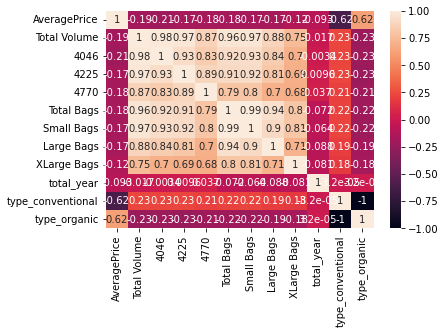

In [24]:
sns.heatmap(df.corr(),annot=True)

In [25]:
df.shape

(18249, 12)

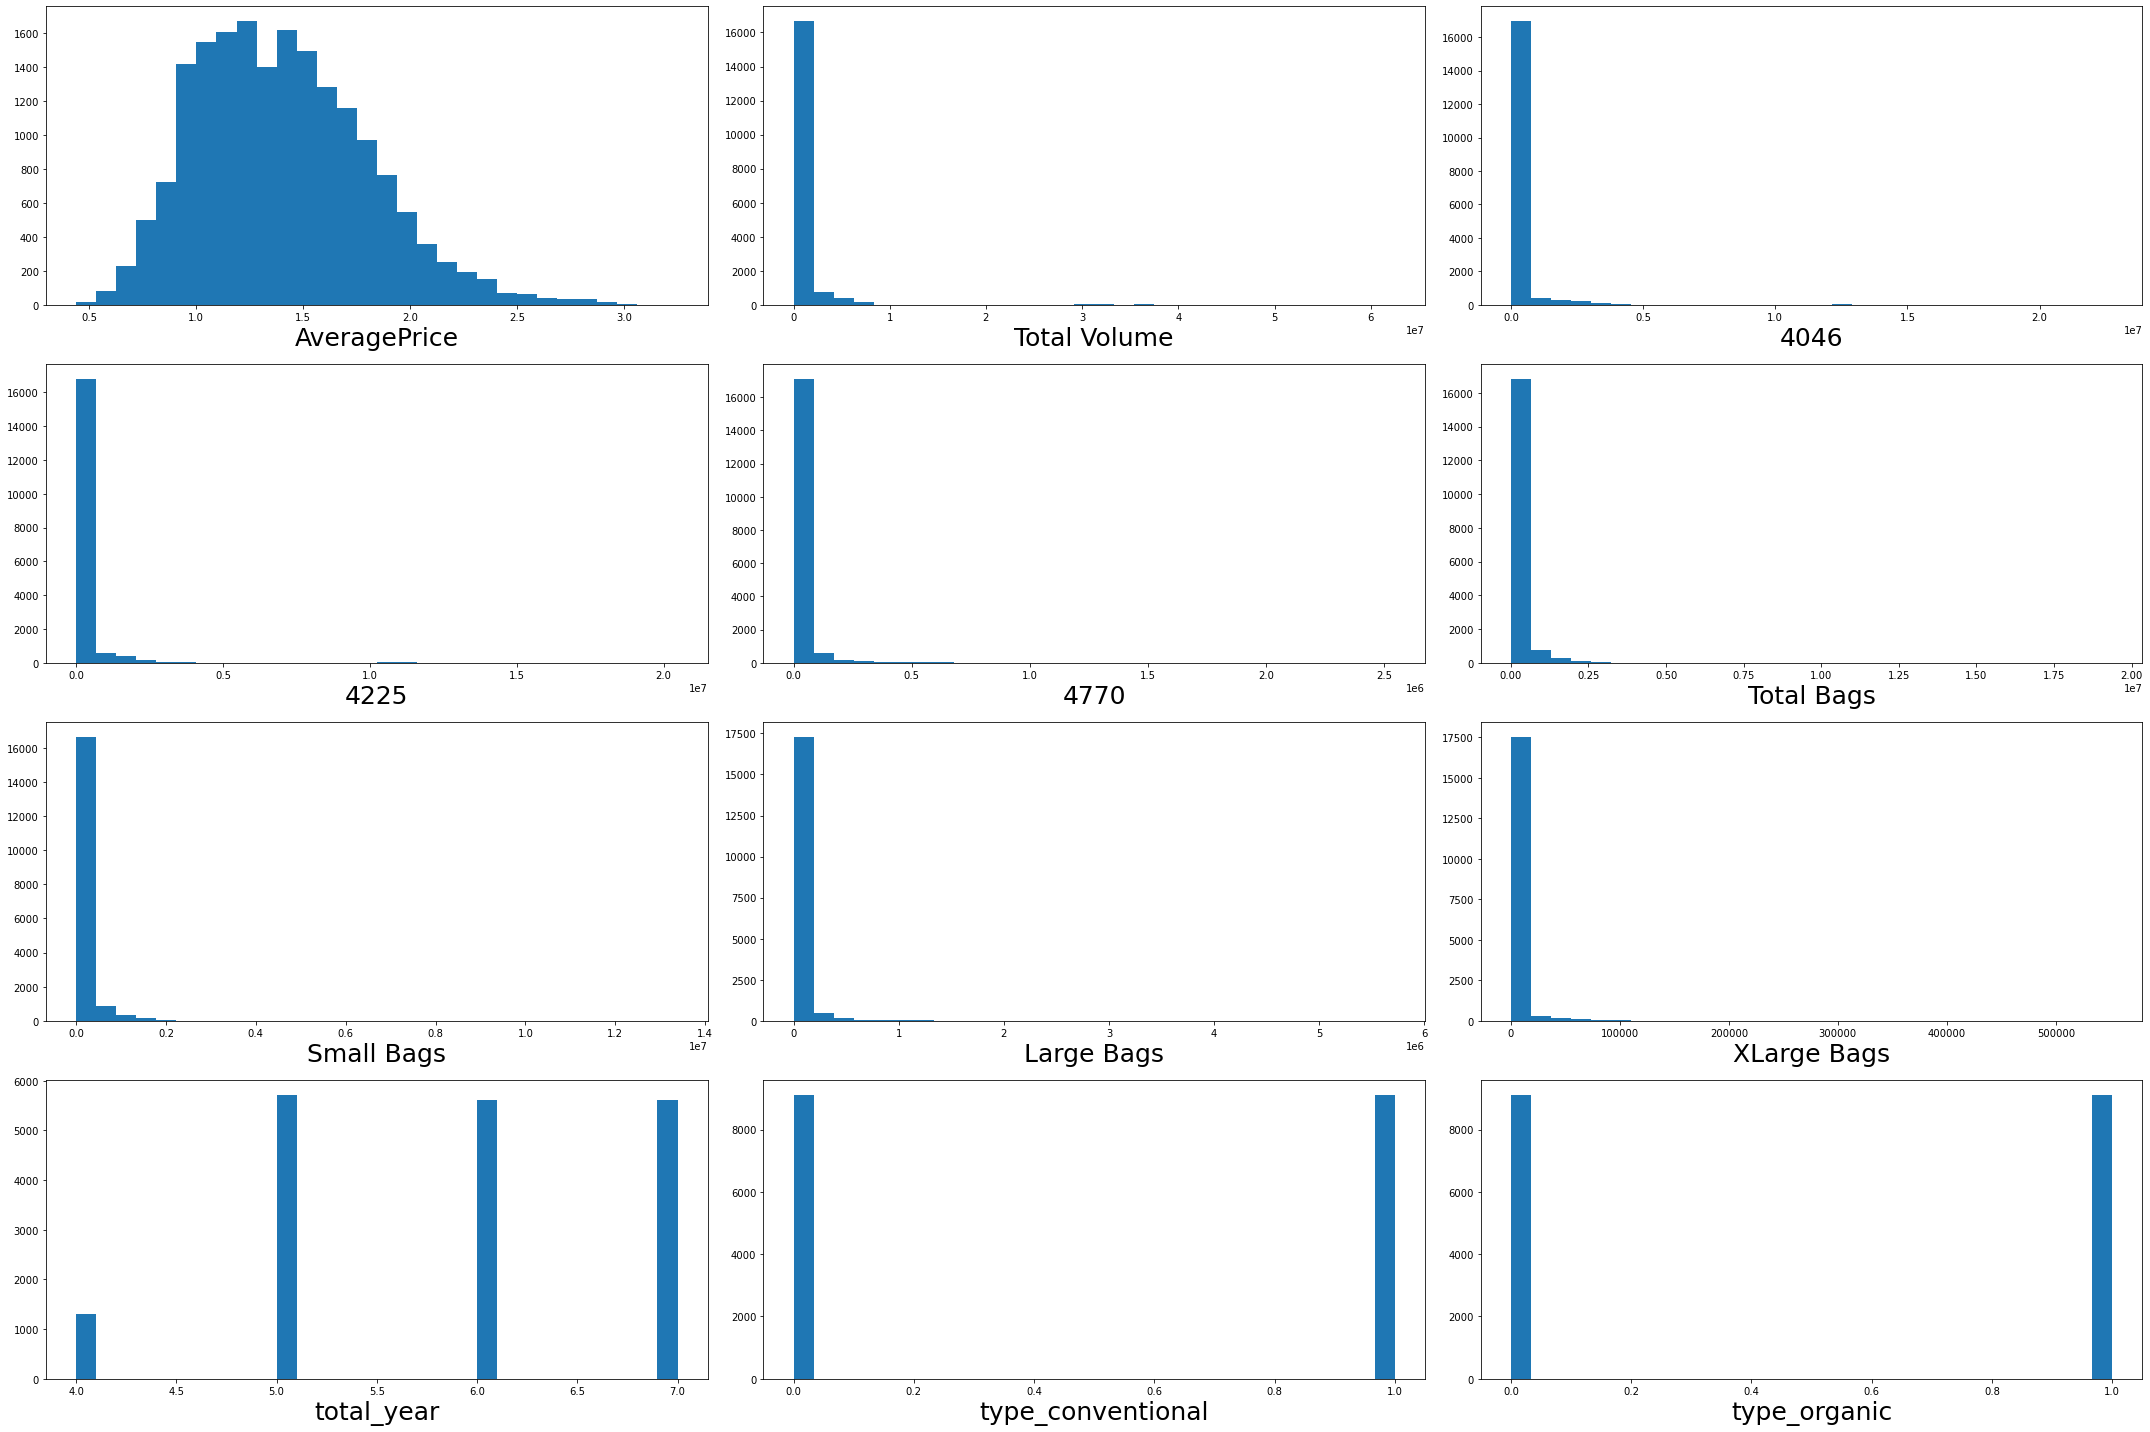

In [26]:
plt.figure(figsize=(30,20))
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        plt.hist(df[column],bins=30)
        plt.xlabel(column,fontsize=25)
        
        
        plotnumber+=1
plt.tight_layout()    

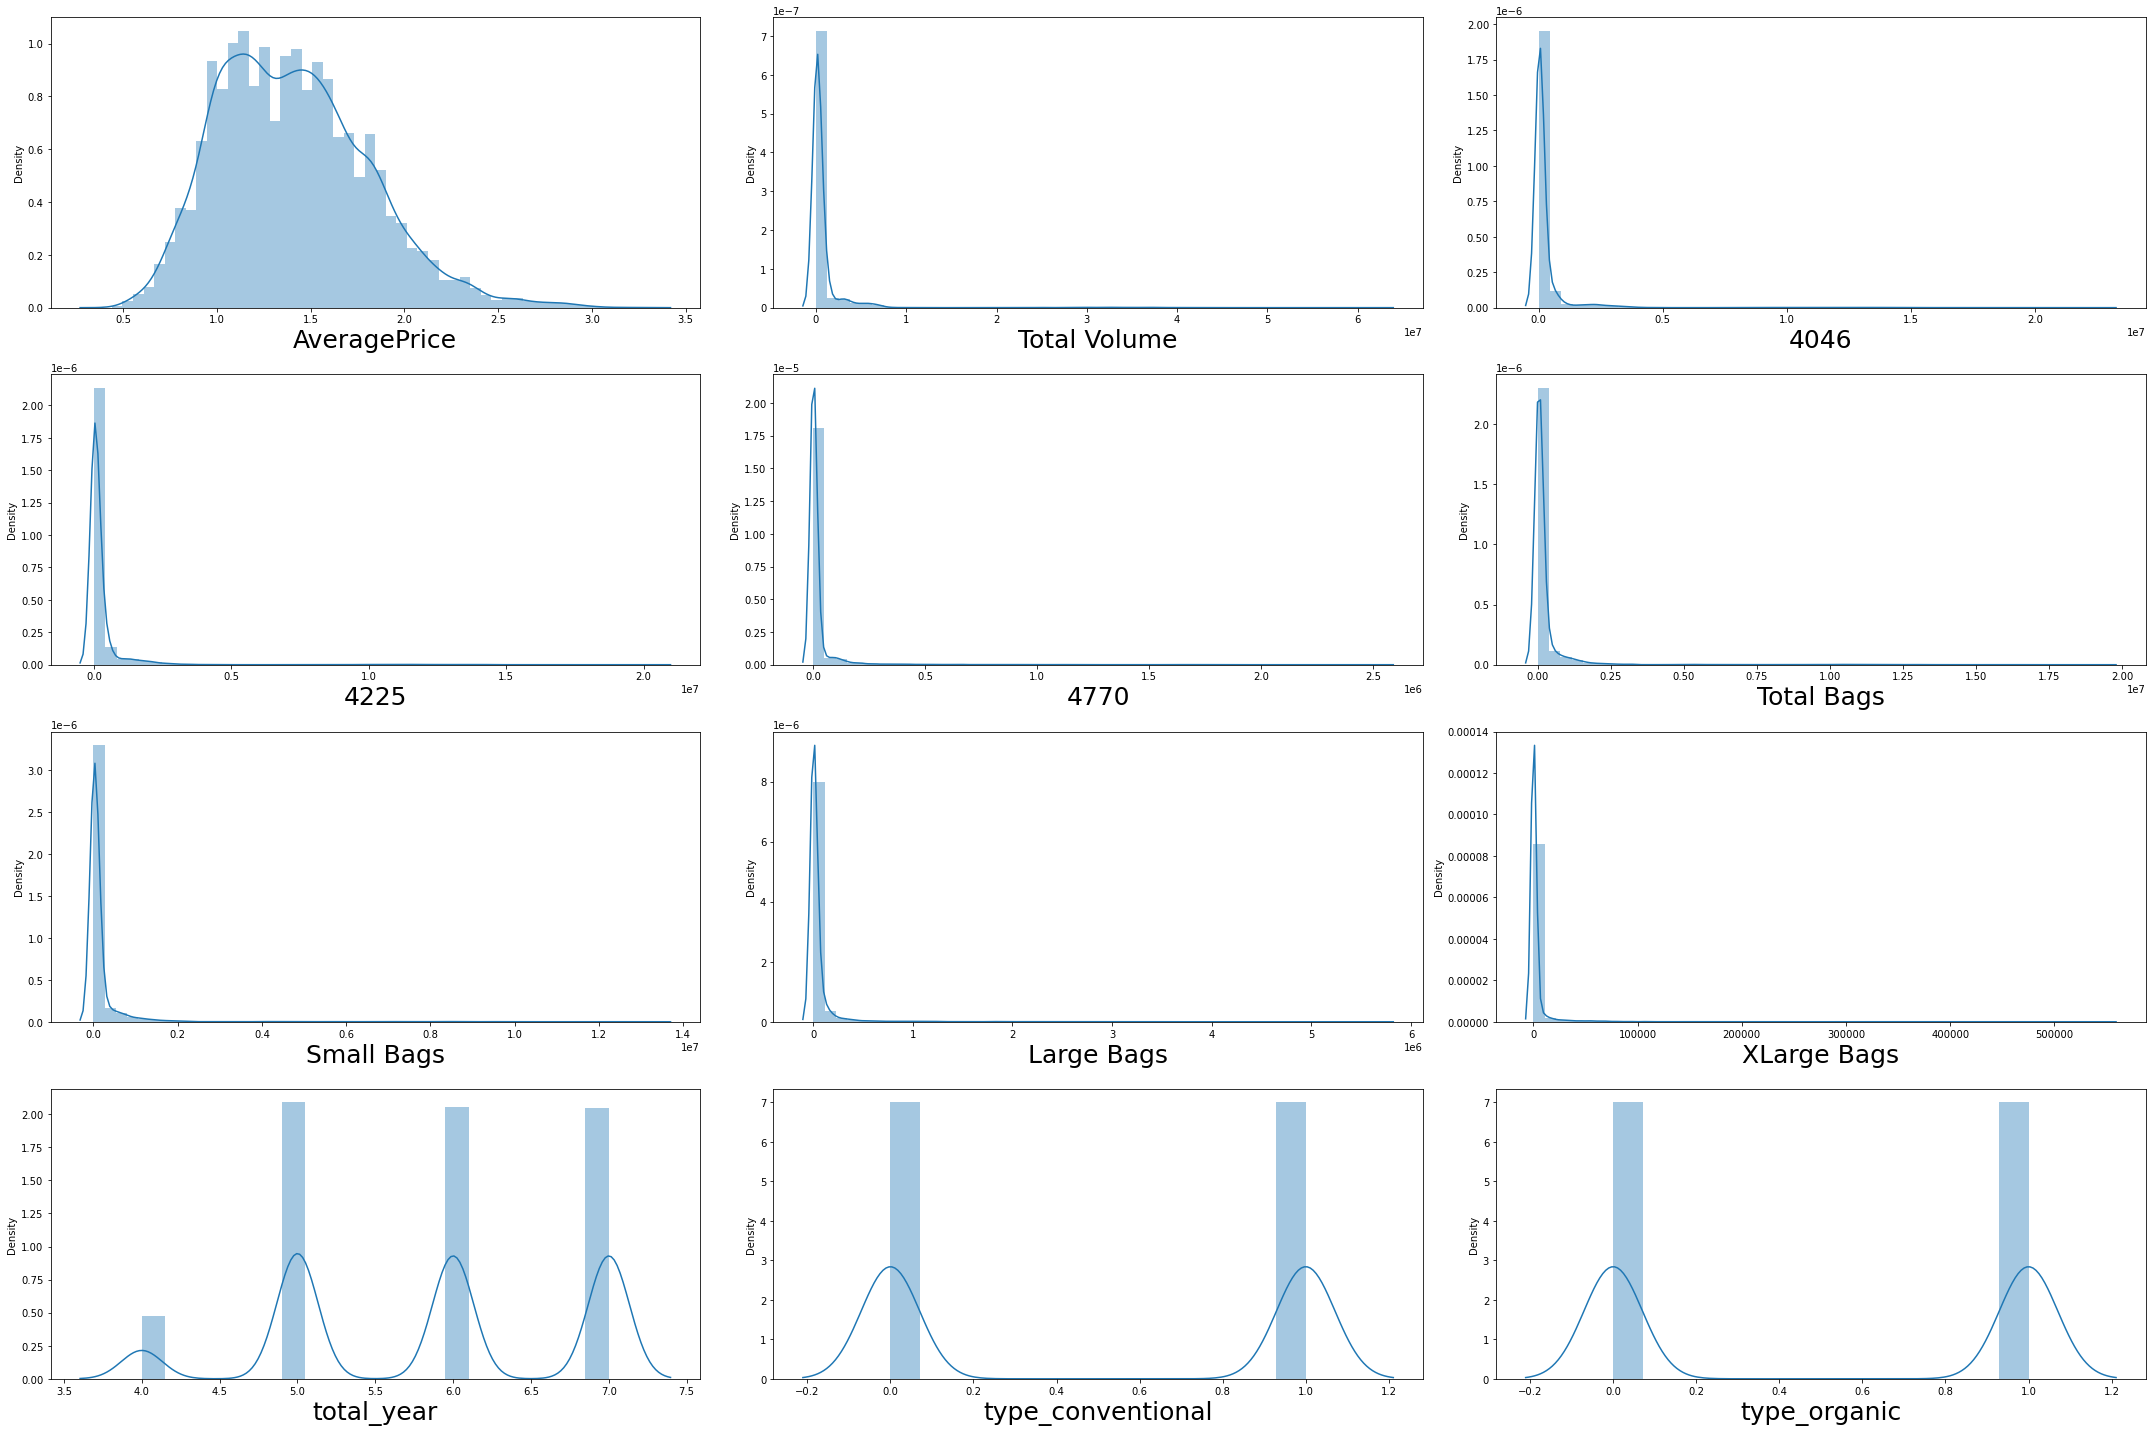

In [27]:
plt.figure(figsize=(30,20))
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
        
        
        plotnumber+=1
plt.tight_layout()    

In [28]:
df.skew()

AveragePrice          0.580303
Total Volume          9.007687
4046                  8.648220
4225                  8.942466
4770                 10.159396
Total Bags            9.756072
Small Bags            9.540660
Large Bags            9.796455
XLarge Bags          13.139751
total_year           -0.215339
type_conventional    -0.000329
type_organic          0.000329
dtype: float64

In [29]:
sk = df.skew()

In [30]:
sk[np.abs(sk)>0.25]

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
dtype: float64

In [31]:
#df['4770'] = np.log(df['4770'])
#df['XLarge Bags'] = np.log(df['XLarge Bags'])
#df['Large Bags'] = np.log(df['Large Bags'])
#df['Small Bags'] = np.log(df['Small Bags'])
#df['Total Bags'] = np.log(df['Total Bags'])
#df['Total Volume'] = np.log(df['Total Volume'])
#df['4046'] = np.log(df['4046'])
#df['4225'] = np.log(df['4225'])

In [32]:
dk = df.skew()

In [33]:
dk[np.abs(dk)>0.25]

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
dtype: float64

In [34]:
df.skew()[np.abs(df.skew())<0.25].all()

True

In [35]:
df.shape

(18249, 12)

In [36]:
df.isnull().sum()

AveragePrice         0
Total Volume         0
4046                 0
4225                 0
4770                 0
Total Bags           0
Small Bags           0
Large Bags           0
XLarge Bags          0
total_year           0
type_conventional    0
type_organic         0
dtype: int64

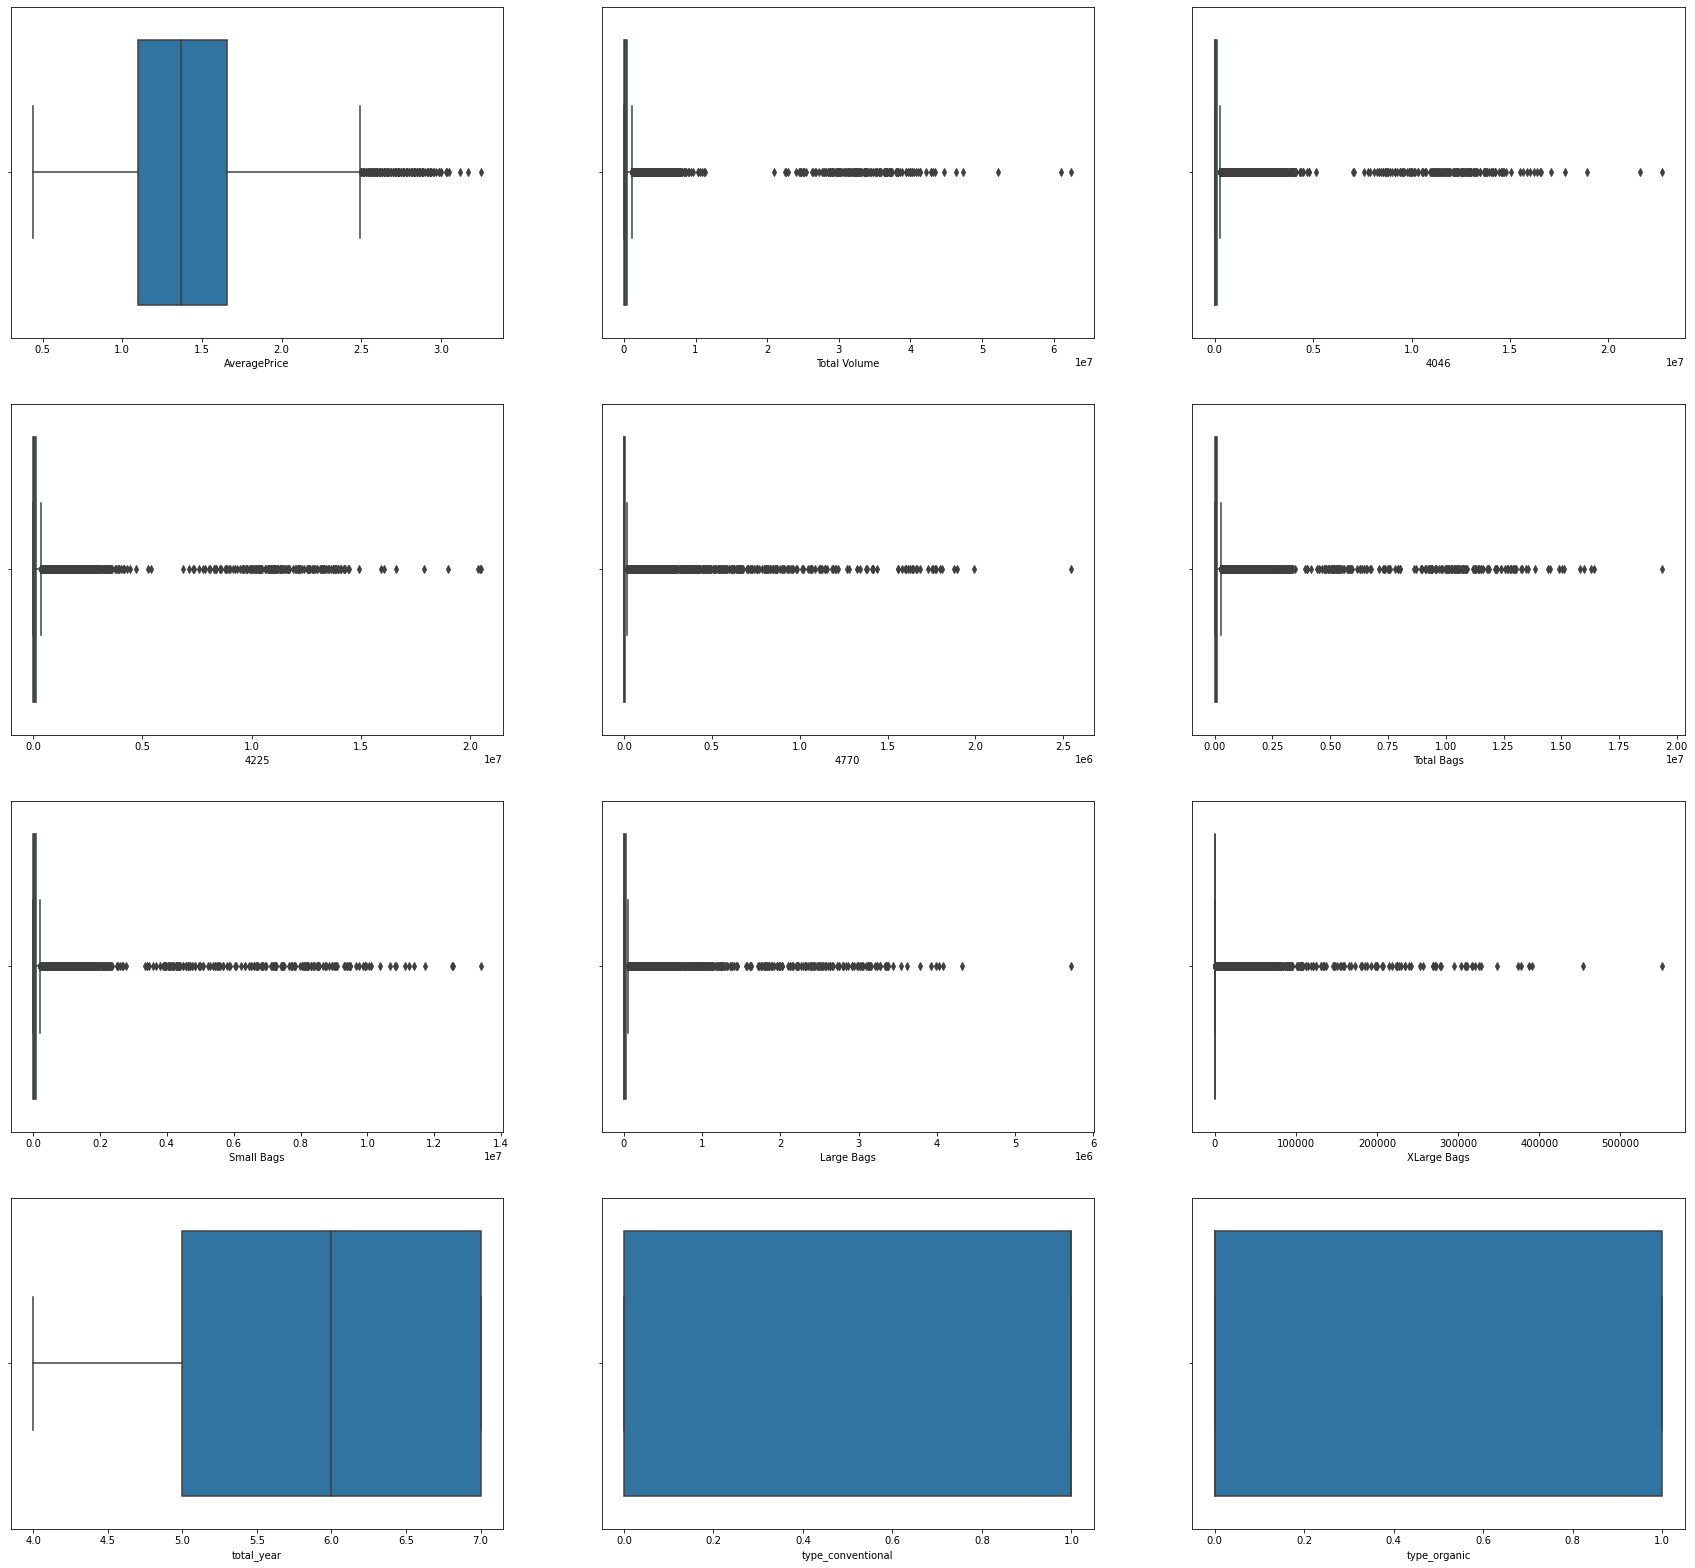

In [37]:
plt.figure(figsize=(30,28))
graph = 1
for column in df:
    if graph<=12:
        ax = plt.subplot(4,3,graph)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
        
        
        
        graph+=1
plt.show()

In [38]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,total_year,type_conventional,type_organic
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,5.852101,0.500082,0.499918
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,0.500014,0.500014
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,5.000000,0.000000,0.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,6.000000,1.000000,0.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,7.000000,1.000000,1.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,7.000000,1.000000,1.000000


In [39]:
df.isnull().sum()

AveragePrice         0
Total Volume         0
4046                 0
4225                 0
4770                 0
Total Bags           0
Small Bags           0
Large Bags           0
XLarge Bags          0
total_year           0
type_conventional    0
type_organic         0
dtype: int64

In [40]:
df.dropna()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,total_year,type_conventional,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,7,1,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,7,1,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,7,1,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,7,1,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,4,0,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,4,0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,4,0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,4,0,1


In [41]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,total_year,type_conventional,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,7,1,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,7,1,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,7,1,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,7,1,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,7,1,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AveragePrice       18249 non-null  float64
 1   Total Volume       18249 non-null  float64
 2   4046               18249 non-null  float64
 3   4225               18249 non-null  float64
 4   4770               18249 non-null  float64
 5   Total Bags         18249 non-null  float64
 6   Small Bags         18249 non-null  float64
 7   Large Bags         18249 non-null  float64
 8   XLarge Bags        18249 non-null  float64
 9   total_year         18249 non-null  int64  
 10  type_conventional  18249 non-null  uint8  
 11  type_organic       18249 non-null  uint8  
dtypes: float64(9), int64(1), uint8(2)
memory usage: 1.4 MB


# features selection

In [43]:
from sklearn.feature_selection import SelectKBest,f_classif

In [44]:
x = df.drop(['AveragePrice'],axis=1)
y = df['AveragePrice']

In [45]:
best_features = SelectKBest(score_func=f_classif,k=10)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)


In [46]:
feature_scores = pd.concat([df_scores,df_columns],axis=1)
feature_scores.columns = ['Score','Feature_Name']#put the column nme


In [47]:
print(feature_scores.nlargest(10,'Score'))

        Score       Feature_Name
10  53.269112       type_organic
9   53.269112  type_conventional
1    5.015080               4046
0    4.122370       Total Volume
3    4.078789               4770
2    3.508901               4225
4    3.373669         Total Bags
5    3.331022         Small Bags
6    3.269397         Large Bags
8    3.056698         total_year


model building

In [48]:
new_x = df[['type_conventional','total_year','Total Volume','total_year','4225','4046','4770','Total Bags','Small Bags','XLarge Bags']]

In [49]:
new_x

,type_conventional,total_year,Total Volume,total_year,4225,4046,4770,Total Bags,Small Bags,XLarge Bags
0,1,7,64236.62,7,54454.85,1036.74,48.16,8696.87,8603.62,0.0
1,1,7,54876.98,7,44638.81,674.28,58.33,9505.56,9408.07,0.0
2,1,7,118220.22,7,109149.67,794.70,130.50,8145.35,8042.21,0.0
3,1,7,78992.15,7,71976.41,1132.00,72.58,5811.16,5677.40,0.0
4,1,7,51039.60,7,43838.39,941.48,75.78,6183.95,5986.26,0.0
...,...,...,...,...,...,...,...,...,...,...
18244,0,4,17074.83,4,1529.20,2046.96,0.00,13498.67,13066.82,0.0
18245,0,4,13888.04,4,3431.50,1191.70,0.00,9264.84,8940.04,0.0
18246,0,4,13766.76,4,2452.79,1191.92,727.94,9394.11,9351.80,0.0
18247,0,4,16205.22,4,2981.04,1527.63,727.01,10969.54,10919.54,0.0


In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [51]:
x_scaler = scaler.fit_transform(new_x)

# model creation

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size=0.20,random_state=41)

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
lr = LinearRegression()


In [56]:
lr.fit(x_train,y_train)

LinearRegression()

In [57]:
lr.score(x_train,y_train)

0.4039156598774125

In [58]:
lr.score(x_test,y_test)

0.416081900207544

In [59]:
y_pred = lr.predict(x_test)

In [60]:
y_pred

array([1.68750924, 1.64581421, 1.67507893, ..., 1.60412437, 1.16844395,
       1.60392727])

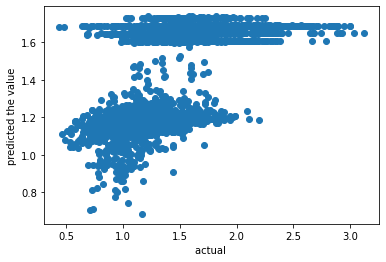

In [61]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual ')
plt.ylabel('predicted the value')
plt.show()

In [63]:
from sklearn.metrics import r2_score

In [64]:
r2_score(y_test,y_pred)

0.416081900207544

# model evalution

In [65]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred = lr.predict(x_test)
mean_absolute_error(y_test,y_pred)
mean_squared_error(y_test,y_pred)
np.sqrt(mean_squared_error(y_test,y_pred))

0.314834658933253

# you have  buliding modellinear regression model
regularization

In [66]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
lassocv = LassoCV(alphas = None,max_iter=100,normalize=True)
lassocv.fit(x_train,y_train)
alpha = lassocv.alpha_
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_test,y_test)

0.41600208073453093

# using ridge regression model

In [67]:
ridgecv = RidgeCV(alphas = np.arange(0.0001,0.1,0.001),normalize=True)
ridgecv.fit(x_train,y_train)
ridgecv.alpha_
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)
ridge_model.score(x_test,y_test)

0.4160049248133909

# random forest regressor

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
accu = rf.score(x_test,y_test)

In [69]:
accu

0.8028340794861699

In [70]:
rf.score(x_train,y_train)

0.9727851154239875

In [71]:
rf.score(x_test,y_test)

0.8028340794861699

In [72]:
r2_score(y_test,pred)

0.8028340794861699

rf evalution

In [73]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred = rf.predict(x_test)
mean_absolute_error(y_test,y_pred)
mean_squared_error(y_test,y_pred)
np.sqrt(mean_squared_error(y_test,y_pred))

0.1829458207394402

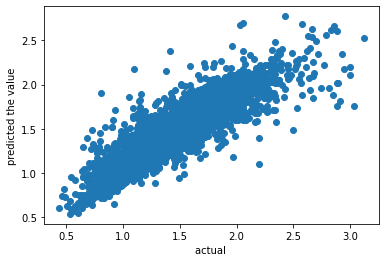

In [74]:
plt.scatter(y_test,pred)
plt.xlabel('actual ')
plt.ylabel('predicted the value')
plt.show()

show the graph linear model

# DecisionTreeRegressor 

In [82]:
from sklearn.tree import DecisionTreeRegressor 

In [85]:
regressor = DecisionTreeRegressor(random_state = 41) 
  

In [86]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=41)

In [87]:
pred = regressor.predict(x_test)
accu = regressor.score(x_test,y_test)

In [88]:
accu

0.6034534207328826

In [89]:
regressor.score(x_train,y_train)

1.0

In [91]:
r2_score(y_test,pred)

0.6034534207328826

In [90]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred = regressor.predict(x_test)
mean_absolute_error(y_test,y_pred)
mean_squared_error(y_test,y_pred)
np.sqrt(mean_squared_error(y_test,y_pred))

0.25944999782205247

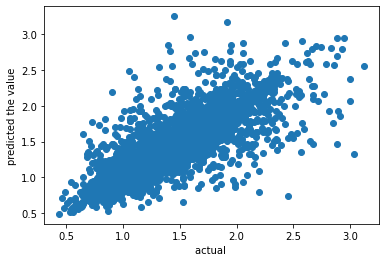

In [92]:
plt.scatter(y_test,pred)
plt.xlabel('actual ')
plt.ylabel('predicted the value')
plt.show()

conclusion random forest is good accuracy other than